> **Tarefa 2: Algorítmos probabilísticos e de indução por árvore
> MAI5025 Introdução ao Aprendizado de Maquina - MECAI
> Base de Dados: Porto Seguro Safe Driver Prediction**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../input/X_train_selecionado.csv')
train = train.drop(train.columns[0], axis=1)
train.sample(5)

,ps_ind_17_bin,ps_ind_05_cat_0,ps_ind_06_bin,ps_ind_02_cat_-1,ps_ind_04_cat_-1,ps_car_04_cat_0,ps_car_02_cat_0,ps_ind_07_bin,ps_car_13,ps_ind_05_cat_6,ps_reg_03,ps_ind_08_bin,ps_ind_03,ps_reg_02,ps_ind_05_cat_-1,ps_car_09_cat_1,ps_ind_16_bin,ps_ind_15,ps_car_11_cat_80,ps_car_09_cat_-1,ps_reg_01,ps_car_07_cat_1,ps_car_11_cat_53,ps_car_11_cat_78,ps_car_09_cat_4,ps_car_11_cat_54,ps_car_11_cat_31,ps_calc_09,ps_car_11_cat_9,ps_calc_13,ps_calc_08,ps_car_11_cat_62,ps_calc_14,ps_car_11_cat_100,ps_car_11_cat_27,ps_car_15,ps_car_11_cat_5,ps_car_11_cat_97,ps_car_04_cat_7,ps_ind_05_cat_2,...,ps_car_11_cat_12,ps_car_11_cat_65,ps_calc_10,ps_calc_03,ps_car_01_cat_1,ps_car_11_cat_26,ps_calc_11,ps_calc_07,ps_ind_01,ps_car_04_cat_5,ps_car_07_cat_-1,ps_ind_13_bin,ps_car_01_cat_-1,ps_car_11_cat_37,ps_car_11_cat_33,ps_car_11_cat_102,ps_car_06_cat_9,ps_car_11_cat_90,ps_car_11_cat_55,ps_car_06_cat_13,ps_calc_12,ps_car_10_cat_2,ps_car_11_cat_91,ps_calc_05,ps_car_11_cat_57,ps_car_11_cat_35,ps_car_11_cat_43,ps_car_11_cat_2,ps_calc_06,ps_ind_05_cat_4,ps_ind_05_cat_3,ps_car_11_cat_58,ps_car_04_cat_8,ps_car_11_cat_13,ps_calc_04,ps_car_06_cat_5,ps_car_06_cat_2,ps_car_10_cat_0,ps_car_06_cat_17,target
146850,1,1,0,0,0,1,0,1,0.836166,0,0.932738,0,3,0.4,0,1,0,5,0,0,0.9,1,0,0,0,0,0,3,0,2,11,0,5,0,0,3.605551,0,0,0,0,...,0,0,10,0.1,0,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0
131909,0,1,1,0,0,1,0,0,0.510914,0,1.288410,0,4,1.3,0,0,1,7,0,0,0.9,1,0,0,0,0,0,5,0,5,9,0,7,0,0,1.732051,0,0,0,0,...,0,0,9,0.1,0,0,8,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,7,0,0,0,0,0,3,0,0,0,0,0
350327,0,1,1,0,0,1,0,0,0.800103,0,0.701338,0,3,0.3,0,1,1,9,0,0,0.9,1,0,0,0,0,0,4,0,0,11,0,8,0,0,3.316625,0,0,0,0,...,0,0,6,0.9,0,0,6,4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,8,0,0,0,0,0,1,0,0,0,0,0
371110,1,1,0,0,0,1,0,1,1.206987,0,-1.000000,0,6,0.3,0,0,0,5,0,0,0.3,1,0,0,0,0,0,2,0,3,9,0,7,0,0,3.741657,1,0,0,0,...,0,0,9,0.7,0,0,4,3,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,8,0,0,0,0,0,4,0,0,0,0,0
370551,0,0,1,0,0,1,0,0,0.776515,0,0.549432,0,5,0.2,0,0,1,11,0,0,0.9,1,0,0,0,0,0,5,0,1,7,0,7,0,0,3.162278,0,0,0,0,...,0,0,8,0.3,0,0,6,3,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,8,0,0,0,0,0,3,0,0,0,0,0


In [3]:
train.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [4]:
X = train.drop(['target'], axis=1)
y = train['target']

**Balanceando a base de dados com under-sampling**

In [5]:
#under-sampling
# from imblearn.under_sampling import RandomUnderSampler
# np.random.seed(1000)
# rus = RandomUnderSampler(return_indices=True)
# X_rus, y_rus, id_rus = rus.fit_sample(X, y)

# print('Quantidade de índices removidos:', len(X)-len(X_rus))
# print(X_rus.shape)
# print(y_rus.shape)

**Dividindo 30% Teste e 70% Treino**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('y_train possui: ', dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print('y_test possui: ', dict(zip(unique, counts)))

(416648, 86)
(416648,)
(178564, 86)
(178564,)
y_train possui:  {0: 401571, 1: 15077}
y_test possui:  {0: 171947, 1: 6617}


** Balanceando com Pesos**

In [7]:
print(y_train.head())

from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
y_weigth = compute_sample_weight(class_weight='balanced', y = y_train)
    
print(y_weigth)

360698    0
232840    0
494377    0
257600    0
129577    0
Name: target, dtype: int64
[ 0.51877252  0.51877252  0.51877252 ...  0.51877252 13.81733767
  0.51877252]


**AM com Regressão Logística**

In [8]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train, sample_weight=y_weigth)
lr_predictions = lr.predict(X_test); lr_predictions
unique, counts = np.unique(lr_predictions, return_counts=True); unique, counts
lr_score = lr.score(X_test, y_test)
print(lr_score)
lr_predict = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_predict); lr_acc
columns = train.columns[1:]

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6266660693084832


**Métricas**

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, lr_predict))
print("Precisão:",metrics.average_precision_score(y_test, lr_predict, average='macro', pos_label=1, sample_weight=None))
print("Sensibilidade/Especificidade/F1:")
print(metrics.classification_report(y_test, lr_predict, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False))

Accuracy: 0.6266660693084832
Precisão: 0.046235820484155414
Sensibilidade/Especificidade/F1:
              precision    recall  f1-score   support

           0       0.97      0.63      0.76    171947
           1       0.05      0.55      0.10      6617

   micro avg       0.63      0.63      0.63    178564
   macro avg       0.51      0.59      0.43    178564
weighted avg       0.94      0.63      0.74    178564



**Matriz Confusão**

Text(0.5, 15.0, 'Previsto')

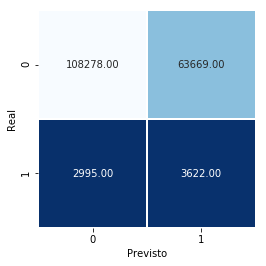

In [10]:
lr_cm = metrics.confusion_matrix(y_test, lr_predictions)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(lr_cm, annot=True, fmt='.2f', linewidths=0.5, square=True, cmap='Blues_r', cbar=False, ax=ax)
plt.ylabel('Real')
plt.xlabel('Previsto')

**Curva ROC**

In [11]:
lr_probs = lr.predict_proba(X_test)
lr_preds = lr_probs[:,1]
lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(y_test, lr_preds)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)
print('A AUC da Curva ROC é: ', lr_roc_auc)

A AUC da Curva ROC é:  0.6256514295296359


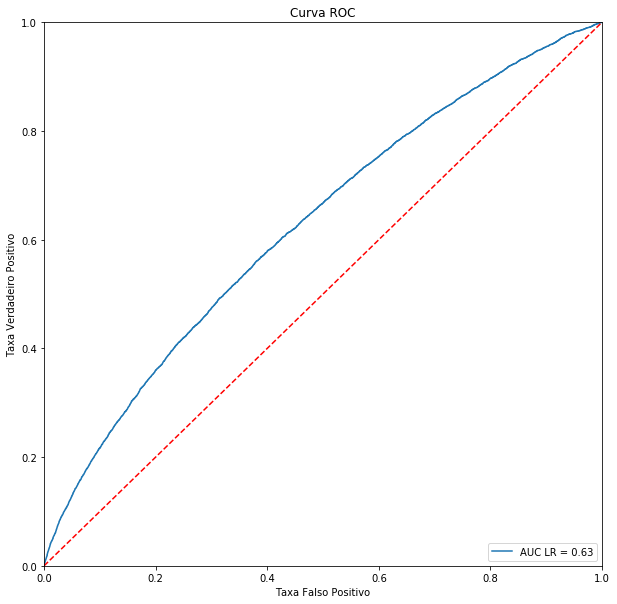

In [12]:
plt.figure(figsize=(10,10))
plt.title('Curva ROC')
plt.plot(lr_fpr, lr_tpr, label = 'AUC LR = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo');